# 6 GRADIENT DESCENT ON ROSENBROCK FUNCTION

In this part we will use Rosenbrock function: 
$f(x,y)=(1-x)^2+100(y-x^2)^2$

## 1. 3D PLOTTING

### 1. Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 2. Defining The Rosenbrock Function

In [2]:
def rosenbrock_function(x,y,a,b):
    return (a-x)**2+b*(y-x**2)**2

### 3. Plotting

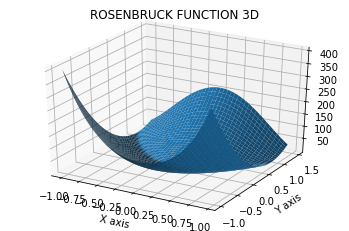

In [3]:
rosenbrock_plot = plt.figure()
axis = rosenbrock_plot.gca(projection='3d')

# tuples
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1.5, 0.05)


X_grid = np.meshgrid(X,Y)[0]
Y_grid = np.meshgrid(X,Y)[1]


#a=1 and b=100
Z =rosenbrock_function(X_grid,Y_grid,1,100) 

#texts on plots
plt.xlabel('X axis')
plt.ylabel('Y axis')


# Plot the surface
surf = axis.plot_surface(X_grid, Y_grid, Z)
plt.title('ROSENBRUCK FUNCTION 3D')
plt.show()

## 2. PARTIAL DERIVATIVES

$ \nabla f(x,y,a,b)= 
\left[\begin{array}{ccc}
f_x\\
f_y\\
\end{array}\right]=
\left[\begin{array}{ccc}
-2a+2x-4bxy+4bx^3\\
2by-2bx^2\\
\end{array}\right]$ 


$\nabla f(x,y,1,100)= \left[\begin{array}{ccc}
-2+2x-400xy+400x^3\\
200y-200x^2\\
\end{array}\right]$





In [4]:
#defining the partial derivatives
def partial_f_x(x,y,a,b):
    return -2*a+2*x-4*b*x*y+4*b**3


def partial_f_y(x,y,a,b):
    return 2*b*y-2*b*x**2

## 3. GRADIENT OF FUNCTION

In [5]:
#defining the rosenbruck function
def rosenbrock_function(x,y,a,b):
    return (a-x)**2+b*(y-x**2)**2

#defining the gradient of rosenbruck function
def gradient_rosenbruck(x,y,a,b):
    return np.array([4*b*(x**3)-4*b*x*y+2*x-2*a,2*b*y-2*b*(x**2)])

## 4. OPTIMIZATION BY GD

### 4.1 Creating a GD Algorithm

First, we should define gradient descent alogrithm.

In [6]:
#defining a gradient descent function especially for rosenbruck function
def gradient_descent(x,y,a,b,alpha,k):
    xy_old = np.array([x,y])
    approach = []
    minimum_point =np.array([a,a**2])
    for i in range(0,k):
        xy_next = xy_old- alpha*gradient_rosenbruck(xy_old[0],xy_old[1],a,b)
        approach.append(xy_next)
        xy_old=xy_next
    print(f'error{minimum_point-approach[-1]}\n',approach[-1])

### 4.2 Finding The Best Hyperparameters

In [7]:
#try 1: x=2, y=2, a=1, b=100, alpha=0.1, k = 5
gradient_descent(2,2,1,100,0.1,5)

error[ 1.57913917e+242 -4.99578346e+161]
 [-1.57913917e+242  4.99578346e+161]


In [8]:
#try 2 : x=2, y=2, a=1, b=100, alpha=0.001, k = 10
gradient_descent(2,2,1,100,0.001,10)

error[-0.27645524 -0.62838782]
 [1.27645524 1.62838782]


In [9]:
#try 3 x=2, y=2, a=1, b=100, alpha=0.0001, k = 100
gradient_descent(2,2,1,100,0.0001,100)

error[-0.46542458 -1.14889175]
 [1.46542458 2.14889175]


### 4.3 Best Performance

Best performance is for starting point at  (2,2) when step size 0.0001 and 300000 iteration. Error is so small.

In [10]:
#x=2, y=2, a=1, b=100, alpha=0.0001, k = 300000
gradient_descent(2,2,1,100,0.0001,300000)

error[-6.70883471e-06 -1.34445604e-05]
 [1.00000671 1.00001344]


## 5. VISUALIZE THE TRAJECTORY

### 5.1 Creating Path Of GD

To be able to plot the GD way, we have to define a new function which gives the each iteration of GD.

In [11]:
def path_of_grad(x,y,a,b,alpha,k):
    xy_old = np.array([x,y])
    path = []
    for i in range(0,k):
        xy_next = xy_old- alpha*gradient_rosenbruck(xy_old[0],xy_old[1],a,b)
        path.append(xy_next)
        xy_old=xy_next
    return path

### 5.2 Choosing The Hyperparameters

In [12]:
#x=10, y=10, a=1, b=100, alpha=0.01, k = 10
path_of_grad(10,10,1,100,0.0002,5)
   
  

[array([-62.0036,  13.6   ]),
 array([18940.12309349,   166.83385652]),
 array([-5.43548325e+11,  1.43492907e+07]),
 array([1.28470813e+34, 1.18177912e+22]),
 array([-1.69630289e+101,  6.60189988e+066])]

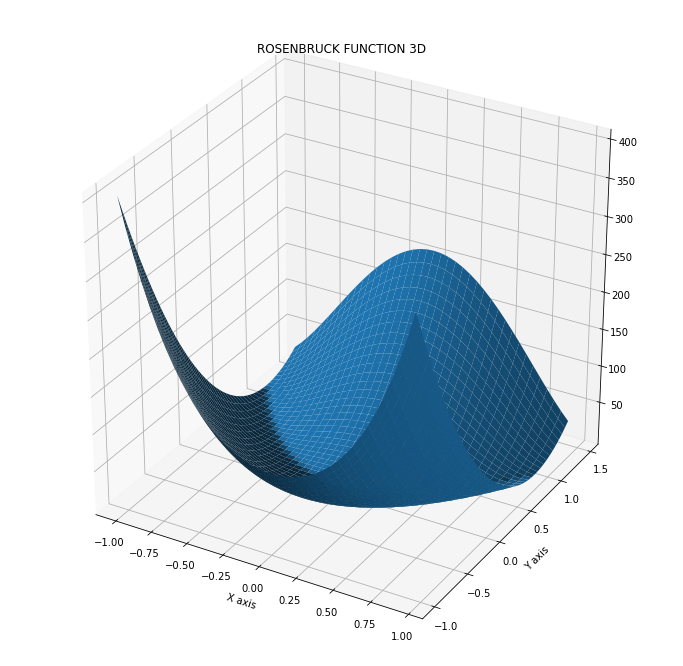

In [13]:
rosenbrock_plot = plt.figure(figsize=(12,12))
axis = rosenbrock_plot.gca(projection='3d')

# tuples
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1.5, 0.05)


X_grid = np.meshgrid(X,Y)[0]
Y_grid = np.meshgrid(X,Y)[1]


#a=1 and b=100
Z =rosenbrock_function(X_grid,Y_grid,1,100) 

#texts on plots
plt.xlabel('X axis')
plt.ylabel('Y axis')


# Plot the surface
surf = axis.plot_surface(X_grid, Y_grid, Z)
plt.title('ROSENBRUCK FUNCTION 3D')


plt.show()